# 성범죄 보도에서 피해자와 여성은 어떻게 다뤄지는가?

## 빈도 분석 및 기술통계

연구자들은 한국 ABC협회의 일 평균 유료부수 순위를 기준으로 상위 5위에 해당하는 종합일간지(조선일보, 동아일보, 중앙일보, 한겨레, 경향)와 같은 순위에서 6, 7위에 위치한 경제신문 둘(매일경제, 한국경제), 그리고 공중파 방송사 세 곳(KBS, SBS, MBC)을 포함한 총 열 곳의 언론사에서 2002년 1월 1일부터 2018년 6월 15일까지 내놓은 성범죄와 관련된 기사를 해당 언론사의 공식 홈페이지에서 수집하였다. 단 MBC의 경우 '성폭행'과 '강간'등의 키워드에 대한 뉴스 검색이 불가능한 관계로 해당 언론사의 기사를 제공하는 포털 사이트 다음의 뉴스 검색을 함께 활용하였으며, SBS 역시 2011년 이전의 자사 뉴스 기사를 제공하지 않았기 때문에 같은 포털 사이트의 뉴스 검색을 통해 기사를 수집하였다. 검색 과정에서는 '강간'과 '성희롱', '성폭행', '성추행', '성범죄', '성폭력'의 여섯 단어를 검색어로 활용하였다.

이 과정에서 수집된 기사는 총 15만 6천건이나, 이 가운데 중복된 기사를 제거하고 기사의 전반적인 내용이 성범죄와 아무런 관련이 없는 것으로 판단되는 기사를 모두 제거한 결과 총 10만 6346건의 기사를 활용하여 분석을 진행하게 되었다. 분석에 사용된 언론사 기사의 숫자는 각각 다음과 같다.

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

#matplotlib의 글자가 꺠지지 않게 하기 위해 matplotlib의 폰트를 바꾸어줌
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family=font_name)
flist = matplotlib.font_manager.get_fontconfig_fonts()

import sys
import csv
import pandas as pd

csv.field_size_limit(100000000)
data = pd.read_csv('processed_2002.csv', encoding='utf8', engine='python')

In [99]:
data.press = data.press.astype('category')
pd.DataFrame(data.press.value_counts())

,press
KBS,25187
SBS,14408
경향신문,13938
중앙일보,11443
MBC,10983
매일경제,8732
동아일보,7953
조선일보,5826
한겨레,4929
한국경제,2775


## 전처리

성범죄 보도 기사의 경우 유명인을 제외하면 가해자와 피해자 모두 익명으로 처리되는 것이 일반적이며, 기사에서 언급된 개개인들은 '김모 씨', 'A양', 'ㄱ군' 등으로 지칭된다. 연구자들은 기사에서 피해자와 가해자, 남성과 여성을 프레이밍하는 과정을 판단하기 위해서는 이러한 익명화된 형태의 피해자 및 가해자에 대한 지칭까지 포함할 필요가 있다고 판단하였다. 이를 위해 전처리 과정에서 한글 성씨나 알파벳 및 자음 등으로 표현된 익명 표현들을 모두 '김'으로 통일하였다. 모든 기사에서 언급된 익명 표현들은 '김씨'나 '김양', '김군'과 같은 형태로 바뀌게 된다.

또한 연구자들은 기사의 단어들에서 의미만을 추출해내기 위해 파이썬의 자연어 처리 패키지인 [KoNLPy](http://konlpy.org/en/v0.4.4/) (박은정, 조성준 2014)에 내장된 [코모란 형태소 분석기](https://github.com/shin285/KOMORAN)를 활용하여 형태소 단위로 텍스트를 분리하였다. 이 과정에서 명사, 형용사, 동사 및 관형사를 제외한 다른 품사(part of speech)들은 모두 제거하였다. 그 외에도 형태소 분석기의 정확도 문제로 인해 제대로 분류되지 않거나 고유명사로 취급되지 않는 몇몇 표현들을 수정하고 의미 없는 단어들을 불용어(stopwords)로 지우는 과정을 거쳤다. 

자세한 전처리 과정과 여기에 사용된 코드는 다음 [링크](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/preprocessing.ipynb)에 업로드되어 있다. 이러한 전처리 과정을 거친 뒤 만들어진 말뭉치(corpus)에서 가장 많이 등장한 단어 50건은 다음과 같다.

In [63]:
import nltk
from nltk import FreqDist

tokens = [j for i in data['pos'] for j in i.split(' ')]
text = nltk.Text(tokens)
freq = FreqDist(text)
# sorted(freq.items(), key=lambda item: item[1], reverse=True)

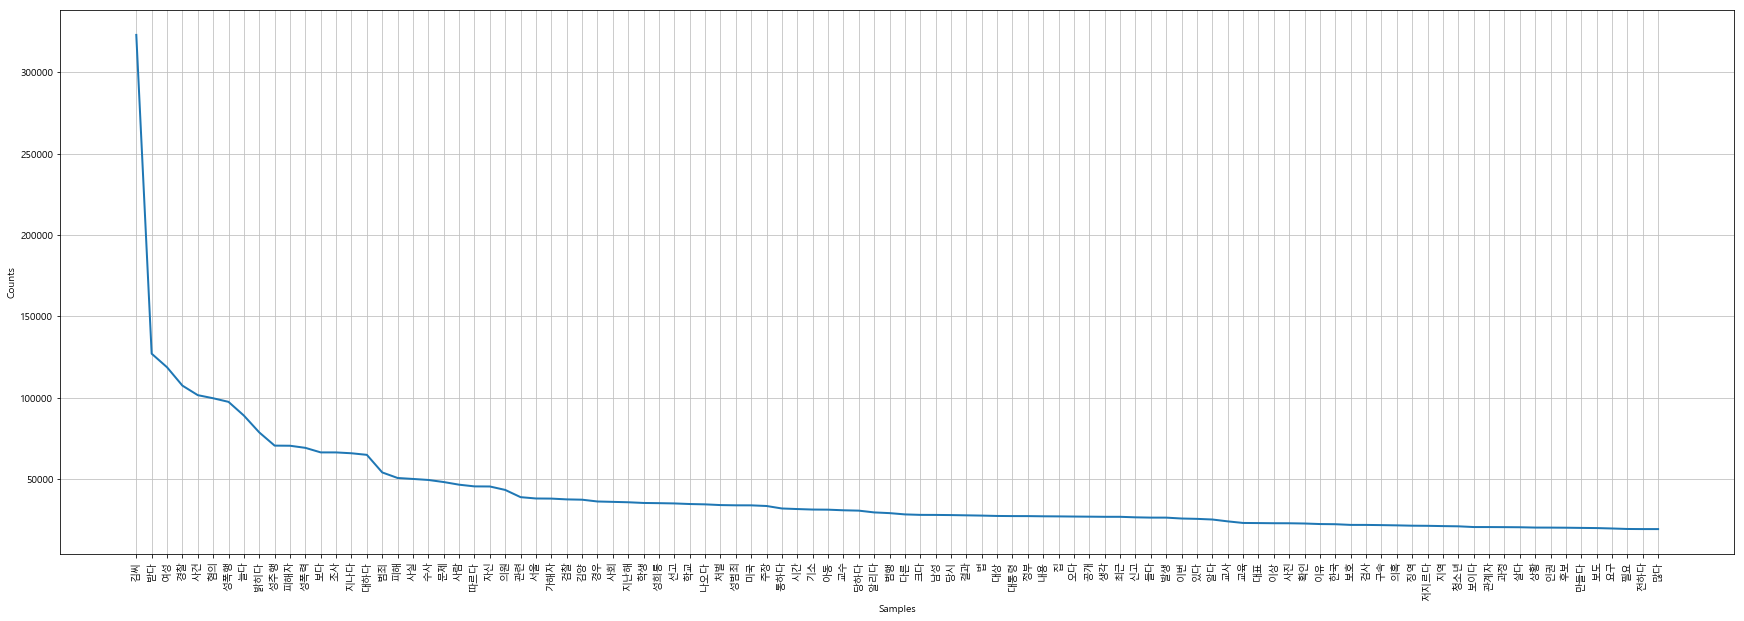

In [6]:
from matplotlib import font_manager, rc 
font_fname = 'c:/windows/fonts/malgun.ttf' # A font of your choice 
font_name = font_manager.FontProperties(fname=font_fname).get_name() 
rc('font', family=font_name)

import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(30, 10)) 
text.plot(100)

In [7]:
from nltk.probability import FreqDist
freq = FreqDist([j for i in data.article for j in i.split(' ')])

fdic = {i[0]:i[1] for i in freq.most_common(100)}

pd.DataFrame.from_dict(fdic, orient='index').to_csv('freq.csv', encoding='utf-8')

## 분석 방법

### Structural Topic Model

연구자들은 이렇게 수집한 대용량 텍스트 데이터를 분석하는 과정에서 최근 주목받고 있는 두 가지 텍스트 마이닝 알고리즘을 사용하고자 했다. 첫 번째로 사용한 방법론은 구조적 토픽 모델(Structural Topic Model)이다. Roberts, Steward와 Tingley(2017)이 제시한 이 알고리즘은 기존에 텍스트 마이닝 연구에서 널리 쓰여 왔던 Latent Dirichlet Allocation 기반의 토픽 모델(Blei, Ng and Jordan)에 시간이나 글의 작성자, 성향과 같은 메타데이터를 쉽게 결합할 수 있기 때문에 최근 정치학 등 사회과학 분야 전반에서 널리 사용되고 있다. 

토픽 모델은 모델 생성 과정에서 연구자가 일정한 토픽 숫자를 정하고, 그렇게 정해진 토픽 숫자를 바탕으로 전체 문서를 토픽과 그 토픽을 구성하는 단어의 집합으로 재구성하는 과정을 거친다. 본 연구에서는 Mimno 등(2011)이 제시한 semantic coherence를 바탕으로 추정한 95개의 토픽 숫자를 사용했으며, 이렇게 도출된 95개의 토픽을 관련 분야의 기존 연구들과 여성가족부 및 기자협회가 발행한 성폭력 보도 가이드라인을 바탕으로 설정한 분류 체계에 맞춰서 다시 재배치하는 방법을 선택하였다. 연구자들의 분류 체계는 다음과 같다.

#### 성범죄 사건에 대한 토픽: 선정성과 동정심, 그리고 객관성
> 사건에 대한 선정적, 자극적 묘사 / 피해자에 대한 동정심을 유발하는 내러티브 / 사건 및 조사, 판결에 대한 객관적 사실관계

#### 성범죄 대책과 반응에 대한 토픽: 구조와 처벌, 성범죄 대책의 목적
> 가해자에 대한 분노 섞인 반응에 기반한 엄벌주의와 처벌 기반의 대책 / 치안 정책이나 사회 구조를 중심으로 피해자를 보호하기 위한 대책

#### 가해자, 피해자에 대해 묘사하는 토픽
> 충동에 사로잡힌 정신질환 환자 / 계획적이고 상습적으로 범죄를 저지른 면식범

> 정신적 상처에서 영원히 고통받는 피해자 / 술을 마시고 유흥을 즐기던 여성

#### 성범죄가 일어난 공간 및 배경을 묘사하는 토픽
> 학교 / 해외 / 직장 / 연예-방송 / 문화예술 / 정치 등

구조적 토픽 모델 분석 결과와 재분류 결과는 다음과 같다.

## Word Embedding

연구자들은 이러한 토픽 모델을 전체적인 말뭉치의 구조와 구성을 파악하기 위한 용도로 사용하면서 이를 보완하기 위한 방법론으로 단어 임베딩 알고리즘(Word Embedding, Word2Vec)을 사용하였다. 이는 구체적인 어휘와 단어의 사용 목적을 파악하기 용이하며, 마이크로소프트의 엔지니어들이 중심이 되어 발표한 논문(Bolukbasi et al. 2016)과 젠더 스테레오타입의 100년간 변화를 조망한 연구(Garg et al. 2018)에서 성공적으로 활용된 바 있다. 단어 임베딩 모델은 뉴럴 네트워크를 활용해 단어들을 일정 차원의 벡터 공간에 투영하는데, 이 과정에서 단어의 의미가 벡터의 형태로 효과적으로 표현될 수 있다. 예를 들어서 다음과 같은 예시는 단어 임베딩을 통해 젠더간 의미 차이가 성공적으로 드러날 수 있음을 보여준다.

\begin{align}
\vec{King} + \vec{Woman} - \vec{Man} & = \vec{Queen}
\end{align}

![kingqueen](https://cdn-images-1.medium.com/max/638/1*Bjtqi5sgc-pE8bB80IAkeA.jpeg)

본 연구에서는 이러한 Word2Vec을 '여성'이나 '피해자'와 같은 중요한 의미를 가진 키워드와 유사한 단어를 찾아내는 데에 활용하는 한편, 위에 언급된 것과 같은 단어 연산을 사용하여 의미를 추출해내는 데에도 사용할 것이다. 예를 들어서 앞서 전처리 과정에서 익명의 개인을 지칭할 때 사용하는 '김모 씨'와 같은 단어의 경우, 연구자가 문서를 직접 살펴보며 하나하나 코딩을 하지 않는 이상 자체만으로는 해당 단어가 피해자와 가해자, 남성과 여성 가운데 어느 쪽을 지칭하는지 판단할 길이 없다. 그러나 단어 임베딩을 결합하면 이러한 난점을 쉽게 해결할 수 있다. 예를 들어서 익명의 개인 김씨 가운데 '남성'이 아닌 '여성'만을 살펴보고 싶다면 어떻게 하면 될까? '왕'에서 여성을 더하고 남성을 뺐던 위의 연산 과정을 살펴보자.

\begin{align}
\vec{김씨} + \vec{여성} - \vec{남성} & = \vec{여성김씨}
\end{align}

다음과 같은 연산을 수행하면 된다. 훈련된 단어 임베딩 모델에 대해서 연산을 수행했을 때 가장 가까운 단어들 30개를 살펴보면 노래방이나 커피숍과 같은 성범죄와 관련된 장소와 여성을 지칭하는 김양, 여자친구, 여종업원, 아내 등의 표현이 높은 비율로 등장하는 것을 알 수 있다.

In [47]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('standard.model')

In [49]:
model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)

[('김양', 0.2931525409221649),
 ('노래방', 0.24651166796684265),
 ('피해', 0.2334289699792862),
 ('시아버지', 0.23155690729618073),
 ('여자친구', 0.2120499312877655),
 ('입원', 0.20920154452323914),
 ('무효', 0.20307213068008423),
 ('수차례', 0.20023255050182343),
 ('정준영', 0.19955840706825256),
 ('여종업원', 0.1984480917453766),
 ('글쓴이', 0.1961631178855896),
 ('진료실', 0.19509950280189514),
 ('커피숍', 0.1942388117313385),
 ('아내', 0.1942237764596939),
 ('쓰다듬다', 0.1887395828962326),
 ('수원지법', 0.18801063299179077),
 ('간호사', 0.18742895126342773),
 ('중순', 0.1868274211883545),
 ('서울행정법원', 0.18383274972438812),
 ('지인', 0.18360494077205658),
 ('명목', 0.1824645847082138),
 ('사무장', 0.18230709433555603),
 ('전속', 0.1818779706954956),
 ('원고', 0.18101146817207336),
 ('군인권센터', 0.1805407851934433),
 ('지난해', 0.17927832901477814),
 ('합의금', 0.17887194454669952),
 ('뒤', 0.17772911489009857),
 ('판시', 0.17671144008636475),
 ('껴안다', 0.17577072978019714)]

## '여성'과 '여자'는 '남성', '남자'와 어떤 점에서 다른가?

여자는 객체이자 성욕의 대상으로서 호명되며, 동사나 형용사적 표현들이 중심이 된다. 반면 여성은 사회적으로 부과되는 직업이나 가족 구성원으로서의 역할이 더욱 두드러지는 경향이 있다. 이러한 모습은 '김양'에서 더욱 극대화되는데, 미성년 여성을 지칭할 때 여성은 그의 가족 관계(큰딸, 여동생, 언니, 딸, 남동생)를 중심으로 서술되고 있다. 

남성을 지칭하는 표현 '남자'의 경우 위에 언급된 '여자'라는 단어와 결부되어 그러한 성욕의 대상으로서 여성에게 행위를 가하는 형태로 언급된다. '남성' 역시 이와 유사하게 성적 범죄의 목표물이 되는 단어와 함께 자주 등장했던 것으로 보인다. '김군'이라는 학생 나이대의 미성년 남성을 지칭하는 단어의 경우 '김양'과는 달리 가족보다도 학교에서의 교사 및 동급생들과의 관계가 중심이 된다는 점에서 여성과 사뭇 다른 패턴이 나타났다.

In [51]:
df = pd.DataFrame()
df['여자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('여자', topn=30)][0:30]
df['여성'] = [(i[0], round(i[1], 2)) for i in model.most_similar('여성', topn=30)][0:30]
df['김양'] = [(i[0], round(i[1], 2)) for i in model.most_similar('김양', topn=30)][0:30]
df['남자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('남자', topn=30)][0:30]
df['남성'] = [(i[0], round(i[1], 2)) for i in model.most_similar('남성', topn=30)][0:30]
df['김군'] = [(i[0], round(i[1], 2)) for i in model.most_similar('김군', topn=30)][0:30]
df['피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('피해자', topn=30)][0:30]
df['가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar('가해자', topn=30)][0:30]
df

,여자,여성,김양,남자,남성,김군,피해자,가해자
0,"(남자, 0.52)","(여직원, 0.38)","(김군, 0.49)","(여자, 0.52)","(남자, 0.44)","(김양, 0.49)","(피해, 0.41)","(범인, 0.52)"
1,"(여자애, 0.49)","(여대생, 0.35)","(큰딸, 0.4)","(여자애, 0.48)","(기혼, 0.35)","(중퇴, 0.47)","(당사자, 0.37)","(혐의자, 0.41)"
2,"(여자아이, 0.48)","(남성, 0.34)","(여동생, 0.36)","(남성, 0.44)","(가부장제, 0.35)","(동급생, 0.46)","(희생자, 0.32)","(가하다, 0.36)"
3,"(나쁜, 0.34)","(여, 0.32)","(야산, 0.34)","(처녀, 0.43)","(남학생, 0.35)","(중학생, 0.42)","(가해자, 0.32)","(행위자, 0.36)"
4,"(처녀, 0.33)","(여자, 0.31)","(여중생, 0.34)","(창녀, 0.42)","(백인, 0.35)","(고등학생, 0.42)","(신고자, 0.32)","(가해, 0.34)"
5,"(싫어하다, 0.32)","(여경, 0.28)","(공터, 0.33)","(예쁘다, 0.41)","(여성, 0.34)","(고교생, 0.41)","(피고인, 0.29)","(주범, 0.32)"
6,"(멋지다, 0.32)","(여학생, 0.28)","(여고생, 0.33)","(아저씨, 0.39)","(치한, 0.33)","(남학생, 0.38)","(종용, 0.28)","(피해자, 0.32)"
7,"(요새, 0.31)","(남녀, 0.28)","(동생, 0.33)","(여주인공, 0.39)","(행인, 0.32)","(학년, 0.37)","(고소인, 0.27)","(신고자, 0.32)"
8,"(여성, 0.31)","(여종업원, 0.27)","(김씨, 0.32)","(뭐, 0.39)","(트랜스젠더, 0.32)","(담임교사, 0.36)","(유족, 0.25)","(관련자, 0.32)"
9,"(그러다, 0.31)","(여군, 0.27)","(강아지, 0.32)","(유부남, 0.38)","(젊다, 0.31)","(동창, 0.36)","(증인, 0.25)","(공범, 0.31)"


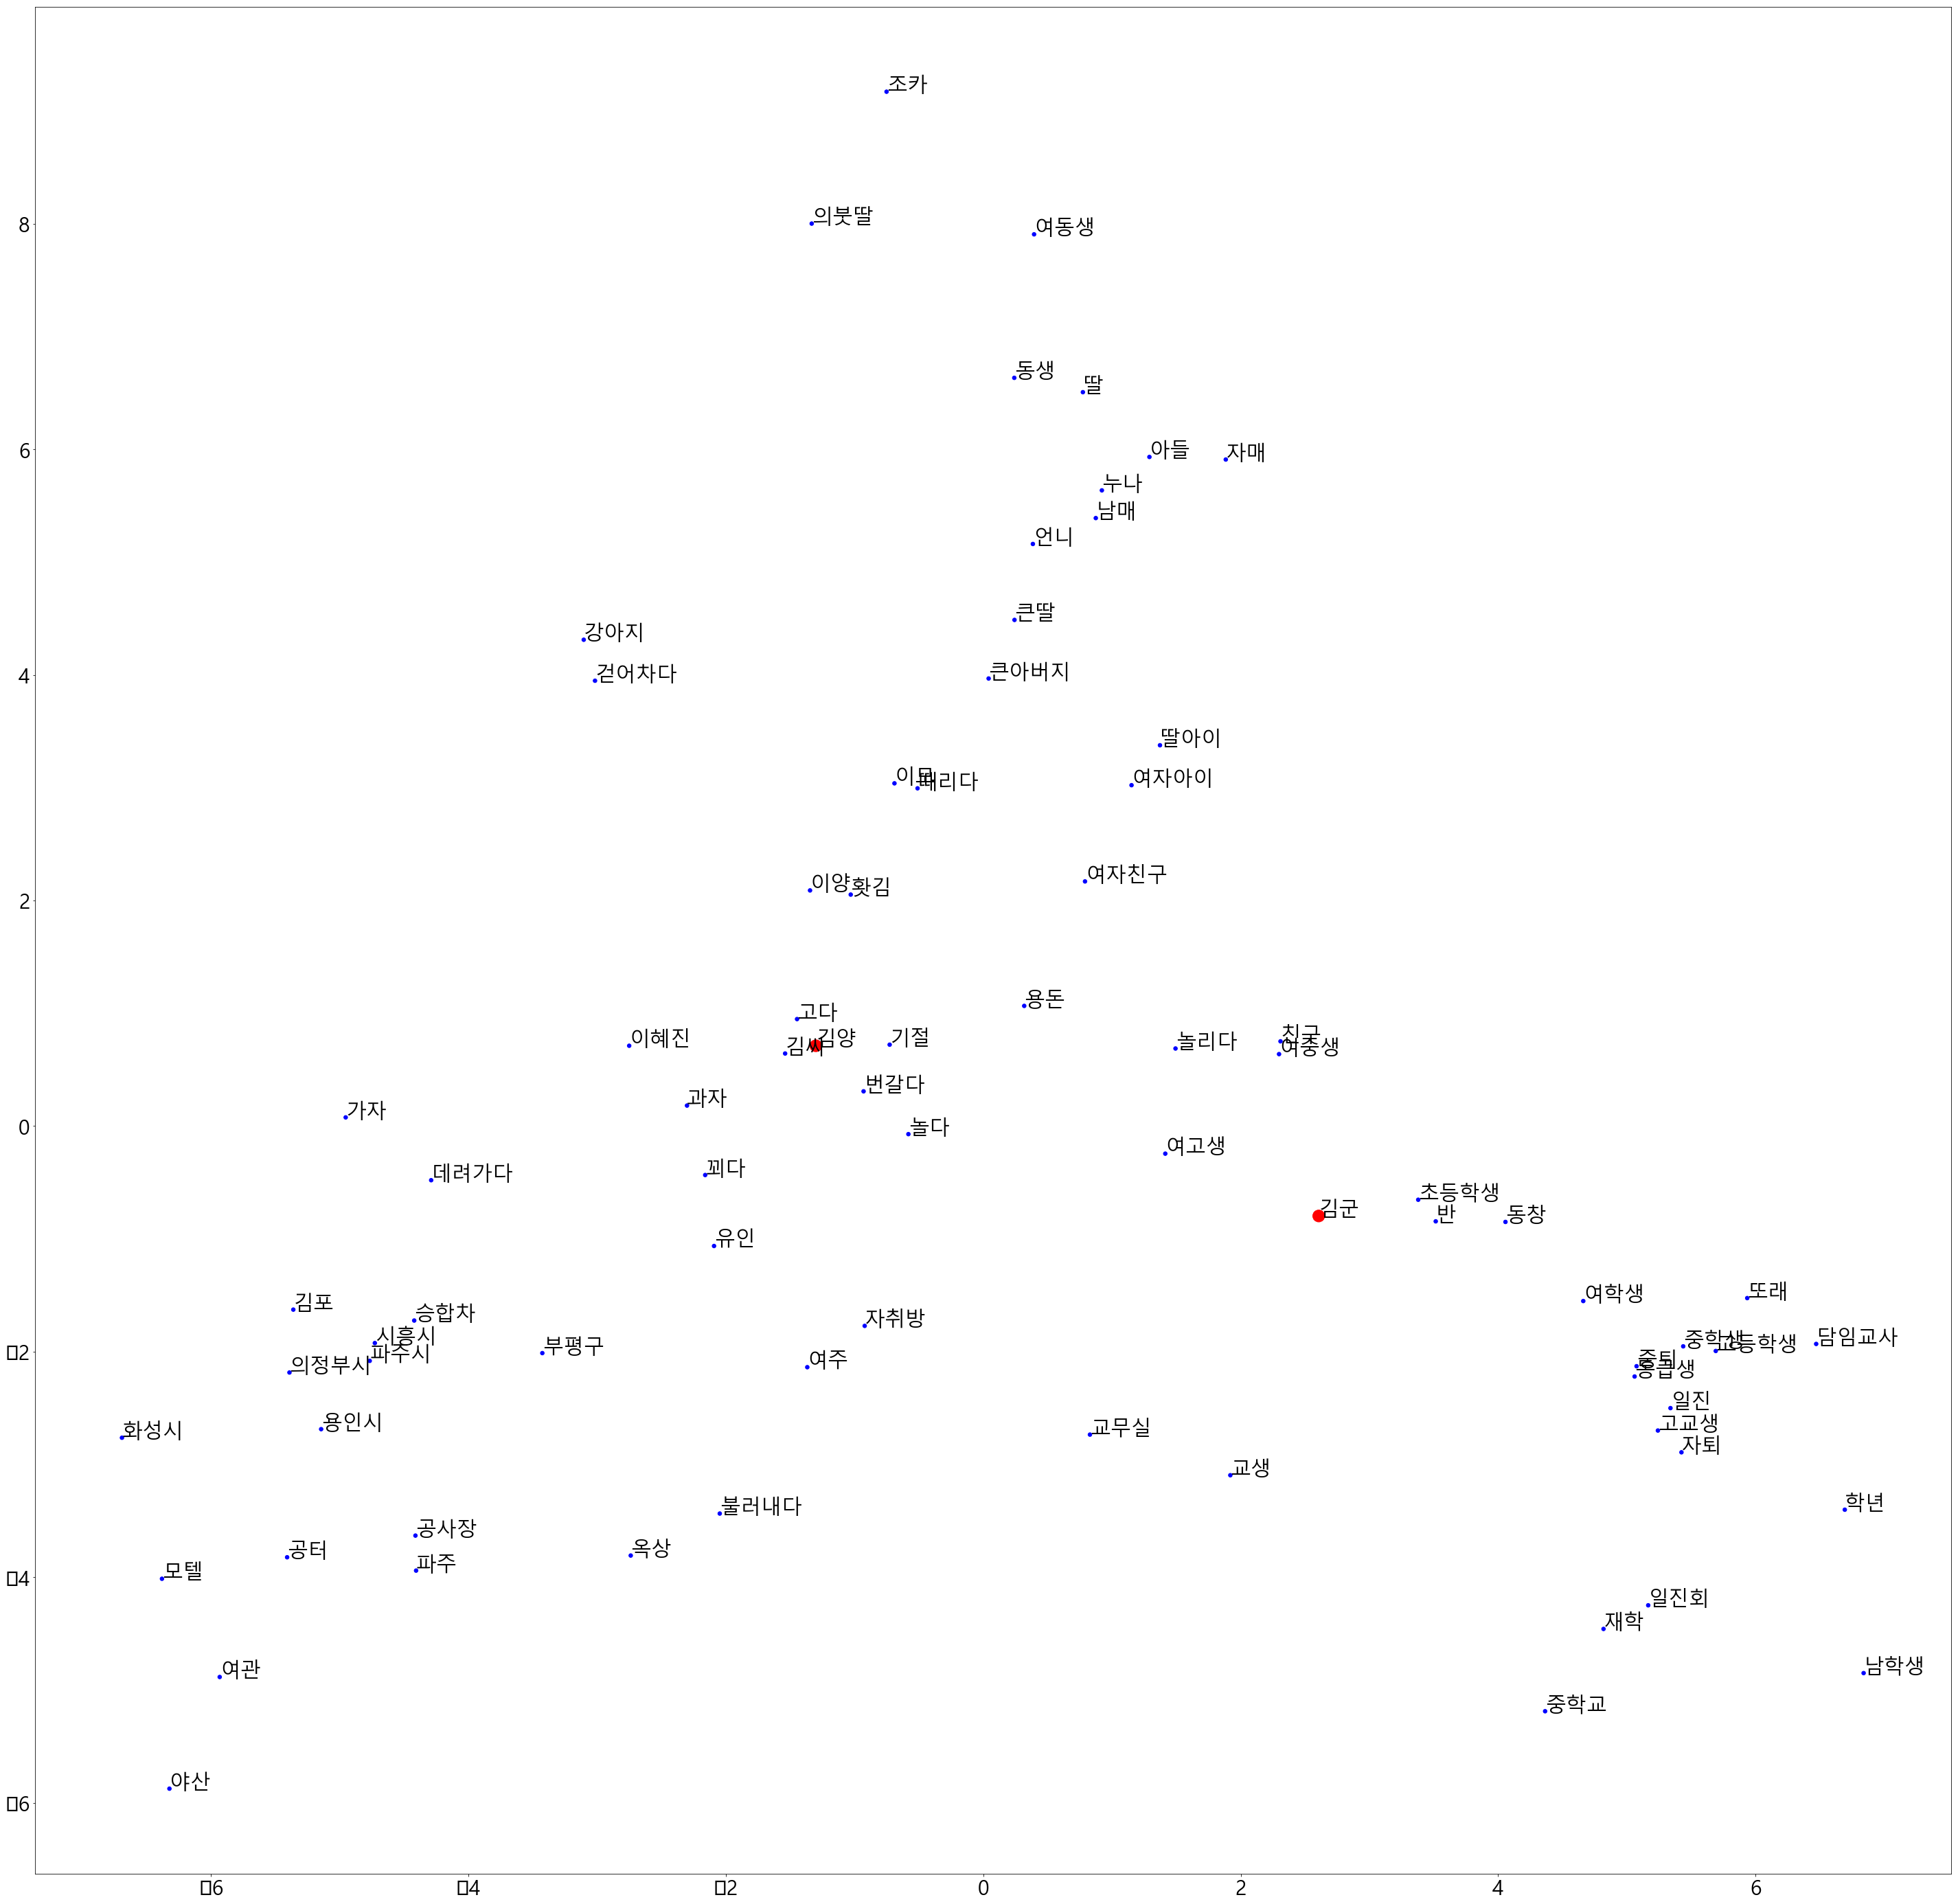

In [146]:
seed = ['김군', '김양']
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=50)]))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(50,50))
plt.scatter(xs,ys, s=s, c=c)
rc('font',family=font_name, size=30)
for k, v, s in zip(xs,ys,words):
    plt.text(k,v,s)

'김씨'라는 젠더가 전제되지 않은 표현에서 여성을 더하고 남성을 뺄 때를 살펴봐도 이와 비슷한 패턴을 발견할 수 있다. 이 때 가장 먼저 나오는 것은 '여직원 김씨', '여대생 김씨'와 같은 그 사람의 직업과 '여자'임을 지칭하는 표현이다. 반면 남성을 더하고 여성을 뺄 때는 별도로 '남자'임을 지칭하는 표현없이 바로 그 개인의 행위에 대한 설명이 이어진다.

In [89]:
df = pd.DataFrame()
df['여성'] = [i[0] for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['여성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['남성'] = [i[0] for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['남성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['여자'] = [i[0] for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['여자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['남자'] = [i[0] for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df['남자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df
df['피해자'] = [i[0] for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['피해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['가해자'] = [i[0] for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df['가해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df

,여성,여성 유사도,남성,남성 유사도,여자,여자 유사도,남자,남자 유사도,피해자,피해자 유사도,가해자,가해자 유사도
0,여직원,0.33,김군,0.26,김양,0.35,동료,0.32,김양,0.29,범인,0.38
1,김양,0.30,남자,0.26,여직원,0.30,남자친구,0.29,노래방,0.25,경찰,0.28
2,여,0.29,시경,0.26,오후,0.27,혐의,0.28,피해,0.23,현행범,0.28
3,사무실,0.28,훔쳐보다,0.23,시키다,0.26,모,0.27,시아버지,0.23,잠복,0.27
4,여대생,0.28,현행범,0.23,의정부시,0.26,내연,0.27,여자친구,0.21,압송,0.27
5,여주인,0.26,모씨,0.23,월초,0.25,유부남,0.26,입원,0.21,혐의,0.26
6,박모,0.26,뒤쫓다,0.23,직원,0.25,지인,0.26,무효,0.20,주범,0.26
7,수련원,0.25,승객,0.23,수차례,0.24,남성,0.26,수차례,0.20,따돌리다,0.26
8,노래방,0.24,쓰다듬다,0.23,김군,0.24,남편,0.26,정준영,0.20,회사원,0.25
9,재직,0.24,찜질방,0.22,사무장,0.24,노래방,0.25,여종업원,0.20,은신,0.24


## 스테레오타입에 부합하는 피해자와 그렇지 않은 피해자: 누가 보호받아야 하는 여성인가?

성범죄 보도 가이드라인에서 지적하고 있듯, 성범죄는 피해자의 직업이나 옷차림 등으로부터 기인한 것이 아니며 피해자가 그로 인한 도덕적 비난을 받아야 할 이유도 없다. 그러나 여성에 대한 직업적 스테레오타이핑에서 드러나듯 언론 보도에서는 이러한 피해자에 대한 상반된 형태의 접근이 분명 등장하고 있다. 연구자들은 이러한 피해자에 대한 시각 차이가 그들이 처한 '공간'을 통해 달리 나타날 수 있다고 보았다.

### 술집과 캠퍼스: 헤픈 여성들과 보호받아 마땅한 여성들

상당수의 성범죄 사건이 발생하는 배경은 클럽, 주점, 나이트클럽 등 주류를 제공하는 업소들이다. 가부장적 문화와 사회적 규범 속에서 피해자들은 이러한 공간에서 피의자와 어울리고, 함께 술을 마시며 취했다는 것만으로도 문란하거나 일탈을 저지른 것으로 여겨지며 사건의 원인을 제공한 것으로 치부되곤 한다. 

연구자들은 공간으로서의 대학이 이와 명확한 대비를 보여줄 수 있는 공간이라 보았다. 동일한 성년의 여성이라 해도 '여대생'이 미래의 사회인이자 매력적인 여성으로 소비되는 반면, 술집이나 클럽의 여성들은 유흥과 탈선을 즐기고 부도덕한 삶을 살아가는 모습으로 그려지기 때문이다. 

연구자들은 '대학'이나 '대학교'의 경우 해당 단어를 직접 여성 및 피해자와 결합할 경우 대학 이름과 학과 이름 등이 지나치게 많이 등장하기 때문에 타당한 비교가 어렵다고 판단하여, '대학'의 유사 단어 가운데 대학 이름과 단과대 및 대학 종류와 연관된 단어를 제외하고, 내부의 구체적 공간 이라 할 수 있는 '캠퍼스'(유사도 0.42)와 '학내'(유사도 0.37)를 대신 활용하였으며, 유사 단어들을 가려내는 과정에서도 '공간'으로 분류될 수 있는 다른 유사 개념들은 제외하였다.

In [73]:
df = pd.DataFrame()
pd.set_option('display.max_rows', 100)

df['피해자+캠퍼스-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '캠퍼스'], ['술집'], topn=100)
                   if i[0] not in ['서강대', '의과대학', '공대']][0:20]
df['피해자+술집-캠퍼스'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '술집'], ['캠퍼스'], topn=100)
                   if i[0] not in ['술집', '식당', '주점', '노래방', '음식점', '유흥주점', '모텔']][0:20]
df['여자+학내-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '학내'], ['술집'], topn=100)
                   if i[0] not in ['고려대학교', '고려대', '서울대학교', '부산대']][0:20]
df['여자+술집-학내'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '술집'], ['학내'], topn=100)
                   if i[0] not in ['나이트클럽', '커피숍', '식당', '유흥주점', '노래방', '다방', '편의점', '목욕탕', '음식점',
                                  '찜질방', '수영장', '모텔', '주점', '사우나', '레스토랑', '룸살롱', '부평구']][0:20]
df

,피해자+캠퍼스-술집,피해자+술집-캠퍼스,여자+학내-술집,여자+술집-학내
0,"(학내, 0.35)","(피해, 0.29)","(총학생회, 0.27)","(남자, 0.39)"
1,"(희생자, 0.28)","(피고인, 0.28)","(여학생, 0.27)","(접대부, 0.39)"
2,"(상담소, 0.26)","(여주인, 0.27)","(공론, 0.25)","(아가씨, 0.37)"
3,"(종식, 0.24)","(당사자, 0.26)","(여자아이, 0.24)","(마담, 0.36)"
4,"(총학생회, 0.24)","(일행, 0.26)","(학칙, 0.24)","(여자애, 0.34)"
5,"(대책위, 0.22)","(증인, 0.25)","(교내, 0.24)","(합석, 0.34)"
6,"(영이, 0.22)","(술값, 0.24)","(사내, 0.24)","(요새, 0.34)"
7,"(아동, 0.22)","(고소인, 0.24)","(운동선수, 0.23)","(술취, 0.33)"
8,"(핫라인, 0.22)","(참고인, 0.24)","(재학생, 0.23)","(술값, 0.33)"
9,"(예방, 0.22)","(목격자, 0.24)","(학생회, 0.23)","(일행, 0.33)"


### 어떤 피해자가 '공적인 언어'로 그들의 피해에 대해 말할 수 있는가?

'술집'이나 '주점'이라는 배경 속에서 여성은 성적 대상이나 착취의 대상으로 언급된다. 언론 기사임에도 불구하고 피해자 여성들은 '창녀'나 '처녀', '접대부'와 같은 표현이나 '이쁘다'와 같은 표현을 통해 대상화된다. 그러나 같은 주체가 술집 대신 '캠퍼스'나 '학내'라는 공간적 배경으로 옮겨왔을 때 프레이밍되는 방식은 사뭇 다르다. 술집에서 '반말'을 듣거나 '동석' 요구에 '응하기'를 요구받는 피해자들과는 달리 대학에서 피해자들은 그들의 피해에 대한 다양한 상담 지원을 받게 된다. 동시에 그러한 피해가 발생한 원인을 근절하기 위한 캠퍼스 내부에 만연한 분위기와 문화를 근절하기 위한 캠페인 역시 제시된다. '여자'와 '학내'라는 단어를 사용했을 때에도 이와 거의 유사한 패턴이 나타난다. 술집에서 여자들이 마담이나 창녀, 접대부로 '이쁘고', '따라오는', '맛있는' 존재로 표상되는 반면 그들이 학내로 옮겨왔을 때 연관되는 단어들은 '남녀'나 '젠더', 그리고 '여성학', '양성평등'과 같은 성범죄와 연관된 구조적 개념들과 학생회, 졸업생 등 그들을 위해 싸워주고 연대할 수 있는 주체들이다.

## 정신질환과 정신병, 트라우마의 두 이면: 피해자와 가해자

![mental](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/stereotypes_criminal.png?raw=true)

토픽 모델 분석 결과 '정신질환'이나 '음주'와 관련된 토픽의 비중이 최근에 들어서 점점 줄어들고 있는 것을 알 수 있다. 이들 토픽은 2000년대 전후의 강력범죄 사건이 발생하던 시기 높은 비율을 차지하다가 점차 감소하는 경향을 보이고 있다. 이와 관련된 서술에서 구체적으로 정신병과 관련 질환은 피해자 및 가해자와 어떤 관계를 가지고 있을까?


### 영원히 고통받는 피해자

미디어에서 나타나는 정신질환 및 트라우마, 상처에 대한 서술은 가해자와 피해자 모두의 스테레오타입을 강화하는 방향에 기여할 가능성이 있다. '상처'와 '우울증'이라는 키워드가 성폭력 피해자와 결합했을 때 어떠한 형태의 의미를 형성하는지 살펴보면 이러한 편견을 잘 알 수 있다. 피해자가 사건으로 인해 당한 상처와 고통은 단순한 아픔이 아니라 씻을 수 없는 타격과 손해를 입힌 것으로 간주되며, 그러한 상처는 쉽게 씻어지지 않고 평생 이어지는 것으로 여겨진다. 생존자들이 겪는 우울증에 대한 서술 역시 이러한 서술이 만연한 것을 알 수 있다. 

이러한 '고통받는 생존자'의 이미지는 성폭력 피해자들에게 공감하고 그들의 치유를 도울 수 있는 방향으로 나아갈 수도 있지만, ㅇㅇ(201)은 성범죄 기억과 그로 인한 트라우마를 극복하고 이전의 일상을 회복해서 살아가고 있는 피해자들의 목소리를 지우는 방향으로 기능할 수도 있음을 지적한다. 한국 언론에서 드러난 피해자의 상처나 트라우마, 그리고 이에 대한 피해자들의 인터뷰 상당수가 고통과 상처를 강조하는 데에 초점이 맞춰져 있을 뿐 그들이 어떻게 원래의 삶을 되찾았는지 말하지 않는데, 이는 정상적인 삶을 살아가는 피해자들에게 '너희는 왜 고통받지 않느냐'라는 2차적 낙인을 씌우는 효과까지 낳을 수 있다.

### 충동에 가득찬 정신질환 가해자

여러 선행 연구들은 가해자의 정신병력과 성적 욕망에 기반한 우발성을 강조하면서 생기는 부작용을 비판하고 있다. 하지만 아래의 분석 결과는 한국 언론의 보도 과정에서 가해자의 정신질환을 강조하고 그들을 일반인과 구분-격리시키고자 하는 담론 구조가 강력하게 자리잡아 있음을 보여준다. 동일한 '상처'라는 단어라도 가해자와 결합할 경우 그 상처는 사회와 주변인들에 대한 원한과 실망감, 저주로 이어진다. 이는 '정신병'이라는 단어와 결합할 때 더욱 명확히 드러나는데, 유영철 및 정남규와 같은 범죄자들의 이름은 해당 벡터와 매우 높은 유사도를 보일 정도로 거의 동일한 것으로 간주되고 있다. 이러한 정신병적 성향은 술(알코올)과 콤플렉스와 같은 요소와 결합하여 가해자의 변태성과 성욕을 더욱 강조하게 된다.

In [117]:
df = pd.DataFrame()
df['상처+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '피해자'], ['가해자'], topn=50)]
df['우울증+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['우울증', '피해자'], ['가해자'], topn=50)]
df['상처+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '가해자'], ['피해자'], topn=50)]
df['정신병+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['정신병', '가해자'], ['피해자'], topn=50)]
df

,상처+피해자-가해자,우울증+피해자-가해자,상처+가해자-피해자,정신병+가해자-피해자
0,"(고통, 0.37)","(정신질환, 0.43)","(범인, 0.31)","(정신질환, 0.37)"
1,"(아픔, 0.34)","(증상, 0.42)","(중상, 0.3)","(범인, 0.37)"
2,"(피해, 0.33)","(불면증, 0.42)","(트라우마, 0.28)","(증후군, 0.35)"
3,"(트라우마, 0.33)","(우울, 0.4)","(주범, 0.27)","(환각, 0.34)"
4,"(희생자, 0.3)","(만성, 0.39)","(고통, 0.26)","(주범, 0.33)"
5,"(정신적, 0.29)","(후유증, 0.37)","(죄인, 0.26)","(소아기호증, 0.32)"
6,"(아프다, 0.29)","(증세, 0.35)","(아픔, 0.25)","(유영철, 0.31)"
7,"(위로, 0.29)","(질환, 0.35)","(충격, 0.25)","(마취제, 0.31)"
8,"(타격, 0.28)","(산업재해, 0.35)","(원한, 0.24)","(사이코패스, 0.3)"
9,"(손해, 0.28)","(증후군, 0.35)","(타격, 0.24)","(중독자, 0.3)"


## '짐승'이라는 메타포가 사용되는 방식:

다음 기사를 참조해 보자.

In [90]:
data[data['pos'].str.contains('초식동물')].reset_index(drop=True)['article'][2][:300]

'\n\n\n\n\n\n\n\n\n\n “우리 집 강아지가 아픈데 한번 봐 줄래?” 집 근처 편의점 앞에서 만난 30대 후반의 아저씨가 건넨 말에 10세, 8세의 두 여자 어린이는 아무 의심 없이 그의 집으로 따라갔다. 이후 그는 마치 맹수가 어린 초식동물을 덮치듯이 두 어린이에게 성폭력을 가했다. 실종된 두 어린이는 두 달 반 뒤 싸늘한 시신으로 발견됐다. 꼭 2년 전인 2008년 3월 초 우리 사회를 떠들썩하게 했던 김양  초등생 살해사건이다. 우연의 일치일까. 1994년 미국 뉴저지 주 해밀턴 타운십에 살던 7세 여자 어린이 메건 캔카는 “강아지'

In [118]:
model.most_similar(['짐승', '가해자'], ['피해자'], topn=50)

[('범인', 0.46330663561820984),
 ('악마', 0.43208393454551697),
 ('살인마', 0.4168400764465332),
 ('강간범', 0.3940938115119934),
 ('주범', 0.38215014338493347),
 ('죄인', 0.37601417303085327),
 ('인면수심', 0.3495655357837677),
 ('악질', 0.33311784267425537),
 ('살인범', 0.33251744508743286),
 ('살인자', 0.3169700801372528),
 ('본성', 0.3134046792984009),
 ('살해범', 0.312894344329834),
 ('연쇄살인범', 0.3116111159324646),
 ('밉다', 0.30799853801727295),
 ('납치범', 0.3040744662284851),
 ('추하다', 0.30273687839508057),
 ('죽이다', 0.3026992976665497),
 ('범죄자', 0.2975364625453949),
 ('희대', 0.2974220812320709),
 ('귀신', 0.2959045469760895),
 ('강력범', 0.29458579421043396),
 ('변태', 0.2921893000602722),
 ('운운', 0.2901719808578491),
 ('우습다', 0.28710129857063293),
 ('창녀', 0.2847568988800049),
 ('파렴치한', 0.28352776169776917),
 ('엽기', 0.2814948856830597),
 ('유영철', 0.28087732195854187),
 ('쥐', 0.280846506357193),
 ('절규', 0.28076696395874023),
 ('울부짖다', 0.2803272604942322),
 ('저주', 0.27827534079551697),
 ('물고기', 0.2767742872238159),
 ('자비', 0.

'짐승'이라는 표현은 '괴물'이나 '사냥'과 같은 동물 메타포와 연관된 단어들과 연관성을 가지나 동시에 '악마'와 같은 피의자를 악마화하고 낙인 찍는 형태의 수식어나 '사이코패스'와 같은 구체적인 가해자의 정신 질환을 의심하는 표현으로도 이어진다.이러한 레토릭은 '어린아이'라는 단어와의 연관성에서 알 수 있듯 주로 아동이나 청소년 대상 성범죄에서 나타나며, '착하다'는 표현을 통해 피해자와의 대비를 더욱 강하게 드러내는 방식이 활용됨을 알 수 있다. '소리치다', '애원'하다와 같은 단어 역시 피해자의 절박함과 가해자의 잔인성을 대비하면서 내러티브를 형성하는 과정이라 할 수 있으며, 가해자는 이러한 피해자를 향해 '울부짖다'거나 '잡아먹다', '달려들다'와 같은 행위를 가하는 당사자가 된다.

## 성범죄 사건에 대한 서술

![expressions](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/images.png?raw=true)

성범죄 사건에 대한 보도가 증가하고 강력 범죄에 대한 사회적 주목도가 높아지면서 사건에 대한 서술이 점차 자극적이고 선정적인 방향으로 흘러갈 수 있다는 우려도 제기되어 왔다. 토픽 모델 분석 결과 추행이나 살해 방식 등에 대한 노골적이고 선정적인 묘사는 2010년대 중반 들어서 지속적으로 감소 경향을 보이고 있으며, 피해자 주변인과의 인터뷰나 피해자의 상처를 부각시키는 내러티브 기반의 토픽 역시 점차 비중이 감소하고 있음을 알 수 있다. 반면 법원이나 경찰 등에서 이뤄지는 성범죄 수사 및 판결, 그리고 범죄 관련 통계에 대한 사실관계 기반의 토픽들은 2002년부터 꾸준히 일정한 비율이 지속됨을 알 수 있다.

### 추행 방식 묘사 단어들

### 사실관계 기반 토픽(경찰 수사와 검찰 및 법원 판결의 차이?)

## 엄벌주의와 사회적 구조의 문제

![solutions](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/solutions.png?raw=true)

성폭력 사건에 대한 반응 및 대책 가운데 가해자에 대한 처벌과 공분에 초점이 맞춰진 토픽과 사회적 구조와 피해자를 위한 예방 교육, 치안 강화 등을 중심으로 한 토픽으로 분류한 다음 그 변화를 살펴본 결과는 위와 같다. 2010년대 즈음 가해자 처벌 담론이 언론을 통해 널리 재생산되었으나 그 이후 감소하는 경향을 보이는 반면, 성범죄를 만드는 사회 구조와 교육 및 피해자 지원 사업 등에 대한 담론이 2010년대 중반 이후 가파르게 다시 상승하는 모습을 보이고 있다.

## 코드 재작업 필요: 직업 구도에서 나타나는 성녀-창녀 이분법

'여자'와 '여성' 키워드로 유사 단어들을 살펴보았을 때 흥미로운 이분법을 발견할 수 있다. '여자'라는 키워드로 지칭될 때 여전히 다수의 여성들은 '여'자가 붙은 승무원, 배우, 사원으로 일컬어지거나 학생으로 지칭되긴 하지만, 일부 여성들이 창녀나 접대부, 포주와 같은 표현을 통해 분리되어 다뤄진다. 이는 문어체적 표현인 '여성'이나 피해자 일반을 다룰 때에는 다소 완화되기는 하나 여성을 지칭하는 거의 모든 직업에만 '여'자가 붙어서 지칭된다는 점은 여기서도 변하지 않는다.

'남자'나 '남성'의 경우 사뭇 다른 패턴이 나타난다. 남성 개인의 직업을 지칭하는 경우도 있지만, 피의자가 남성일 경우 범죄의 목표가 되었던 여성들의 직업 역시 상당히 높은 비중을 차지하기 때문이다. 특히 '남자'라는 키워드로 접근했을 때 키워드의 절반 이상은 남자가 아닌 창녀, 마담, 여선생, 여고생, 여사원 등 여성의 직업을 지칭하는 단어들이 차지했다. 이는 성범죄 보도 기사에서 '남자'라는 단어가 쓰일 때조차도 범죄 남성의 직업보다 그 남성의 목표 여성의 직업 정보가 더욱 많이 등장했음을 의미한다. '남성'이라는 표현에서도 이와 유사하게 '매춘부'나 '여고생', '여직원', '댄서'와 '방송작가'가 등장한다.

## 피의자와 피해자, 그리고 익명의 일반인 언급 상황

연구자는 젠더와 직접적으로 관련되어 있지 않는 표현인 '피해자'와 '피의자'에서도 이러한 직업적 차이가 나타나는지 살펴보았다. 언론 보도에서 피해자 및 가해자의 직업 정보를 '가해자인 회사원 김모 씨'나 '피해자 김모 씨(회사원)'와 같은 형태로 표현하는 점을 감안하여, 익명의 인물을 나타내는 표현인 'ㅇ모 씨'에서 피해자 단어 벡터를 더하고 피의자 단어 벡터를 뺀 것과 반대의 연산을 수행한 결과를 함께 살펴보았다.

분석 결과 '피해자'라는 단어와 밀접하게 연관되어 함께 등장한 단어는 학생이나 여교사, 교사, 여직원 등 학교와 연관된 직업이 한 축을 이루고, '여군'을 필두로 소령이나 대위, 대령 등 군대와 관련된 직위들이 다른 한 축을 이룬다는 것을 알 수 있다. 흥미로운 것은 가해자의 입장인 '대령'이나 '상사' 등의 영관급 장교 및 연차가 높은 군 간부들이 가해의 대상으로 언급되면서 '하사'와 같은 하급 간부들이 아니라 '이병'이라는 남성 사병 역시 피해자로 언급되고 있다는 점이다. '형사'와 '여경', '수사관' 등 군대와 유사하게 계급과 직함을 지닌 경찰 역시 높은 유사도를 보였다. 

반면 'ㅇ모 씨'라는 익명 표현을 경유해서 드러나는 피해자의 직업적 이미지는 조금 더 일반적인 여성 직업을 대표한다. 피팅모델이나 여비서, 항공기의 승무원과 간호사, 간호조무사나 아르바이트생, 여배우, 대학원생과 유학생 등 다양한 직업군이 높은 유사도를 보였다. 

이와 같은 패턴은 피의자와 피의자에 대한 익명화된 언급에서도 비슷한 경향을 보인다. '피의자' 단어 벡터는 대령이나 형사, 경정, 경사 등 군대와 경찰의 정형화된 계급 체계에서 부여된 직함과 밀접하게 연관되어 있으나 언급되는 계급이 장성급 등으로 더욱 높아지는 경향(사단장, 여단장, 원사)이 보인다. 반면 익명화된 일반인 호명 과정에서는 군이나 경찰과 관련된 직함은 사라지고 외교관, 치과의사나 교수와 같은 전문직부터 건설업자나 회사원, 경찰관, 참사관, 그리고 공익요원과 휴학생, 무직에 이르기까지 매우 다양한 직업 스펙트럼을 보여준다. 

### 피의자는 건설업자, 여자는 미용사?

성범죄 관련 보도를 '여성-남성'과 '피의자-피해자' 구조로 살펴보았을 때 발견할 수 있는 것은 남성 피의자의 직업 정보가 '피의자'라는 단어를 매개로 나타나는 반면, 여성 피해자의 정보는 언제나 '여성'을 통해 언급된다는 것이다. 이는 남성이 굳이 '남성'이라는 호명 없이도 직업 이름 하나만으로 그의 공적 지위나 정체성을 확립할 수 있는 반면, 여성의 경우 언제나 직업적 정체성 앞에 '여자'나 '여성'이 붙어야 하며, 심지어 '여사원', '여학생', 여직원', '여승무원'과 같이 직업 이름 앞에도 언제나 '여'가 붙어야만 하기 때문이라 할 수 있을 것이다.